## 1.1 神经网络的推理
### 1.1.1 神经元计算模型

神经元的数学模型如图所示，即信号的加权总和，被激活函数A转换成节点y

$h= w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b$

<img src="./images/neural_cell.png" width="400"/>

#### 输入 input

$(x_1,x_2,x_3)$ 是外界输入信号，一般是一个训练数据样本的多个属性。

#### 权重 weights

$(w_1,w_2,w_3)$ 是每个输入信号的权重值。

#### 偏置 bias

$b$ 是偏移值。在脑神经细胞中，一定是输入信号的电平/电流大于某个临界值时，神经元细胞才会处于兴奋状态，即当：

$$w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 \geq t$$

把t挪到等式左侧来，变成$(-t)$，然后把它写成 $b$，即偏置：

$$w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b \geq 0$$


#### 加权求和 sum

$$
\begin{aligned}
h &= w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b \\\\
&= \sum_{i=1}^m(w_i \cdot x_i) + b
\end{aligned}
$$



#### 激活函数 activation

$$A=\sigma{(h)}$$

全连接层的变换是线性变换。激活函数赋予它“非线性”的效果。 sigmoid 函数是常用的激活函数：

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

<img src="./images/activation.png" width="400" />


In [ ]:
# sigmoid函数图形
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 500)
y = sigmoid(x)
plt.plot(x, y, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()
plt.grid(True)
plt.show()

### 1.1.2 神经网络的正向传播
$
(h_1,h_2,h_3) = (x_1,x_2)
\begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{2p} \\
\end{bmatrix}
+(b_1,b_2,b_3)
$
<img src="./images/neural_network.png" width="400" />




In [1]:
# 一个简单的两层神经网络推理过程
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)
h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2
print(s)

[[ 0.29718093 -0.36317014 -2.29881629]
 [-0.28284314 -0.92757944 -1.87419356]
 [-0.56644478 -1.12060975 -1.8292    ]
 [-0.22629845 -0.87385708 -1.91171668]
 [ 0.79521851 -0.03976975 -2.36632233]
 [ 0.70987412 -0.07932245 -2.38918061]
 [-0.40023864 -1.06822624 -1.74727623]
 [-0.54006148 -0.94319788 -2.09870428]
 [ 0.36710854 -0.32737823 -2.29323837]
 [ 0.09157139 -0.68993984 -1.92654905]]



### 1.1.3 常用激活函数

| 激活函数 | 公式 | 导数 | 优点 | 缺点 | 应用场景 |
| --- | --- | --- | --- | --- | --- |
| Sigmoid | $f(x) = \frac{1}{1 + e^{-x}}$ | $f'(x) = f(x)(1 - f(x))$ | 输出在(0, 1)，适合概率输出 | 容易出现梯度消失问题 | 二分类问题的概率输出 |
| Tanh | $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ | $f'(x) = 1 - f(x)^2$ | 输出在(-1, 1)，有助于数据中心化 | 同样存在梯度消失的问题 | 需要中心化输出值的情况 |
| ReLU | $f(x) = \max(0, x)$ | $f'(x) = 1 (x>0), 0 (x<0)$ | 计算简单高效，缓解梯度消失 | 可能导致某些神经元“死亡” | 广泛应用于各种类型的神经网络中 |
| Leaky ReLU | $f(x) = \max(\alpha x, x)$ ($\alpha$ 是一个小常数) | $f'(x) = 1 (x>0), \alpha (x<0)$ | 解决ReLU可能导致神经元“死亡”的问题 | 在实践中不一定总是优于ReLU | 担心ReLU导致神经元死亡的情况 |
| Softmax | $f(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$ | 不直接适用 | 将一组值转换为概率分布 | 主要用于输出层 | 多类分类任务的输出层 |

激活函数的图像如下图所示，由于Softmax主要用于多类别输出的概率计算，它的图示不直观，因此这里只绘制前四种激活函数的图形。


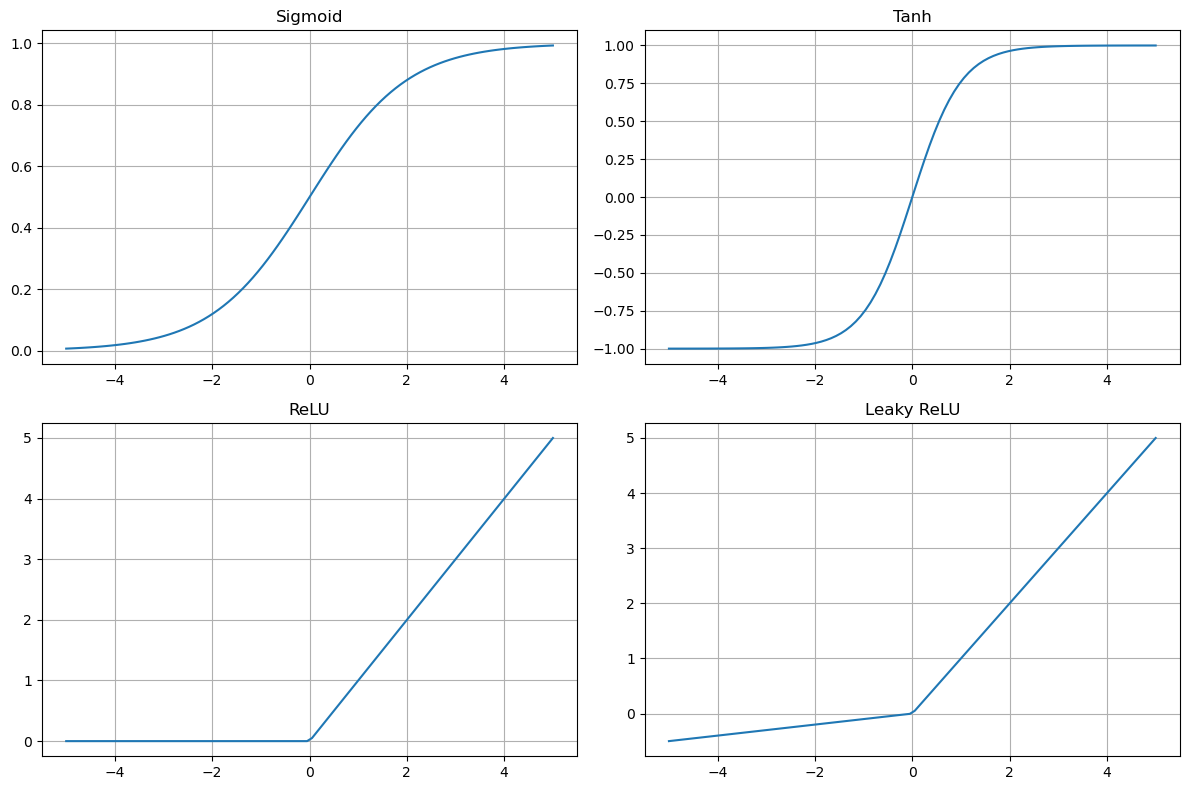

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, x * alpha)

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU')
plt.grid(True)

plt.tight_layout()
plt.show()